# Intento para el potencial con la integral de clase

C:\Users\isaac\AppData\Local\Temp\ipykernel_20228\79755304.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(integrand_corrected, low_limit, np.inf, args=(b, E, k))
C:\Users\isaac\AppData\Local\Temp\ipykernel_20228\79755304.py:25: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral_result, _ = quad(integrand_corrected, low_limit, np.inf, args=(b, E, k))


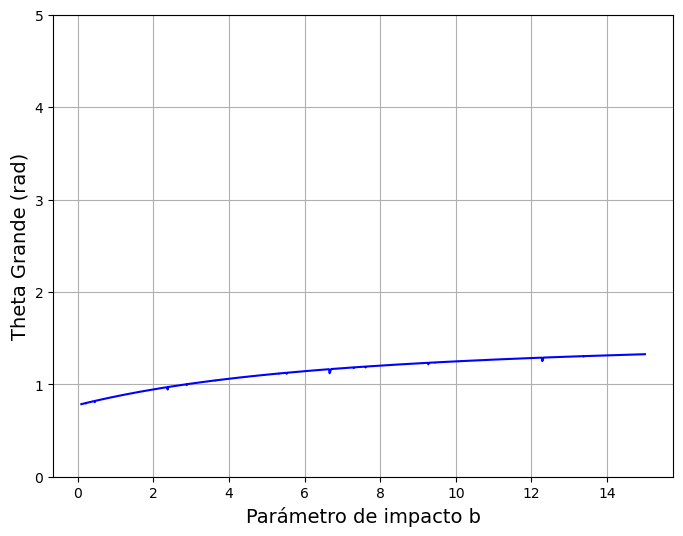

In [89]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parámetros fijos
E = 1  # Energía fijada
k = 1  # Constante del potencial


def r_min(b, k,E):
    return k / 2*E - (b) * np.sqrt(1 + (k /2*E*b)**2)


def integrand_corrected(r, b, E, k):
    V = k / r  
    un = 1 - b**2 / r**2 - V / E
    if un <= 0: 
        return 0 
    return (b / r**2) / np.sqrt(un)

def theta_b_corrected(b):
    r_m = r_min(b,k,E)
    low_limit = max(0.1, r_m)  # Asegurarse de que sea al menos 0.1
    try:
        integral_result, _ = quad(integrand_corrected, low_limit, np.inf, args=(b, E, k))
        return integral_result  # Multiplicamos por 2 para considerar el ángulo completo
    except Exception as e:
        print(f"Error durante la integración para b={b}: {e}")
        return np.nan  # Devuelve NaN si hay un error

# Valores del parámetro de impacto b
b_val = np.linspace(0.5, 2, 1000)

# Cálculo de Theta para cada valor de b
theta_values_corrected = [theta_b_corrected(b) for b in b_val]

# Gráfica Theta vs b
plt.figure(figsize=(8, 6))
plt.plot(b_values, theta_values_corrected, color='blue')
plt.xlabel("Parámetro de impacto b", fontsize=14)
plt.ylabel("Theta Grande (rad)", fontsize=14)
plt.grid(True)
plt.ylim(0, 5)  # Ajustar el límite superior del eje y para una mejor visualización
plt.show()


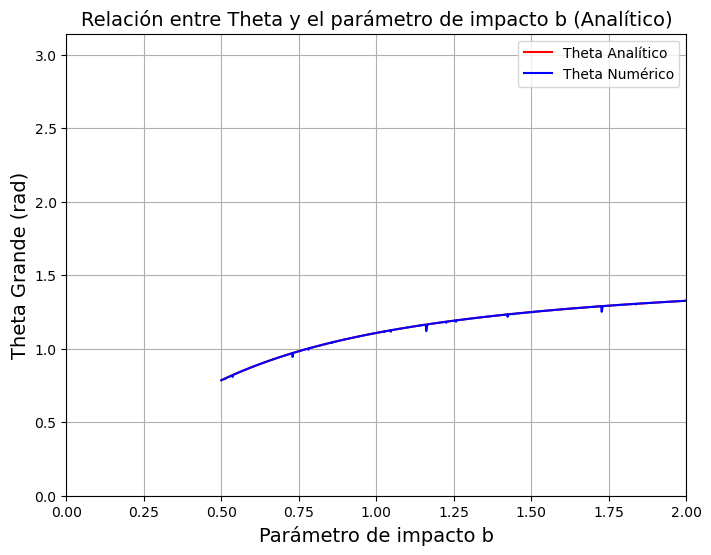

In [109]:
# Parámetros fijos
E = 1  # Energía fijada
k = 1  # Constante del potencial

# Función analítica para Theta(b)
def theta_analytical(b, k, E):
    term = (k / (2 * E * b))
    return np.arccos(term / np.sqrt(1 + term**2))

# Valores del parámetro de impacto b
b_values = np.linspace(0.5,2.0, 1000)

# Cálculo de Theta analítico para cada valor de b
theta_values_analytical = theta_analytical(b_values, k, E)

# Gráfica Theta analítico vs b
plt.figure(figsize=(8, 6))
plt.plot(b_values, theta_values_analytical, color='red', label='Theta Analítico')
plt.plot(b_values, theta_values_corrected, color='blue', label = 'Theta Numérico')
plt.xlabel("Parámetro de impacto b", fontsize=14)
plt.ylabel("Theta Grande (rad)", fontsize=14)
plt.title("Relación entre Theta y el parámetro de impacto b (Analítico)", fontsize=14)
plt.grid(True)
plt.ylim(0, np.pi)  # Limitar el rango del eje y para una mejor visualización
plt.xlim(0, 2)  # Limitar el rango del eje x para ]una mejor visualización
plt.legend()
plt.show()



Como $2\Theta = \pi - \theta$ 

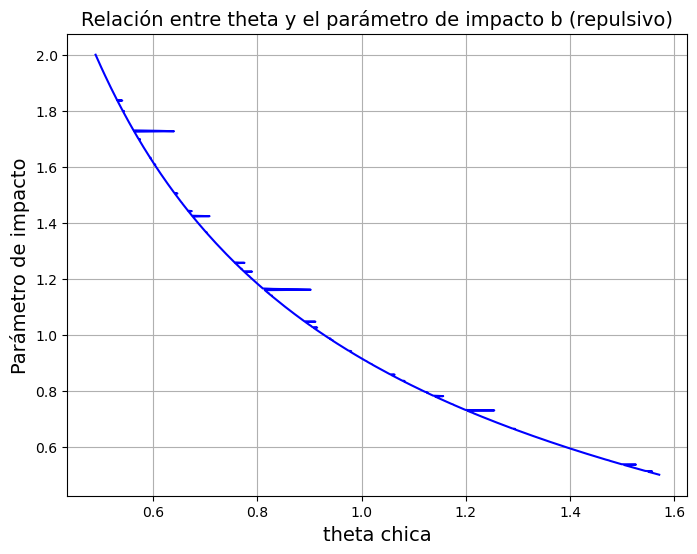

In [111]:
theta_chica = np.zeros_like(theta_values_corrected)
for i in range(len(theta_chica)):
    theta_chica[i] = np.pi - 2*theta_values_corrected[i]
plt.figure(figsize=(8, 6))
plt.plot(theta_chica, b_values, color='blue')
plt.xlabel("theta chica", fontsize=14)
plt.ylabel("Parámetro de impacto", fontsize=14)
plt.title("Relación entre theta y el parámetro de impacto b (repulsivo)", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.show()

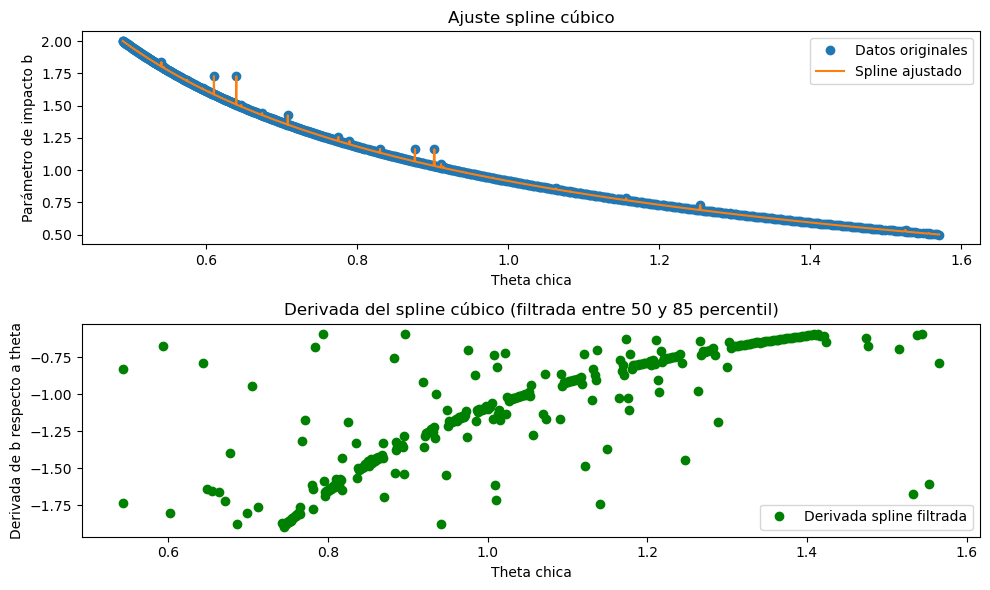

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def vel(theta_chica, b_values, percentil_inferior=5, percentil_superior=95):
    # Asegurarse de que theta_chica esté en orden ascendente
    indices_ordenados = np.argsort(theta_chica)
    theta_chica_ordenado = theta_chica[indices_ordenados]
    b_values_ordenado = b_values[indices_ordenados]
    
    # Ajustar spline cúbico
    spline = CubicSpline(theta_chica_ordenado, b_values_ordenado)
    
    # Derivar el spline
    derivada_spline = spline.derivative()
    
    # Calcular la derivada en los puntos de theta_chica
    derivada_b = derivada_spline(theta_chica_ordenado)
    
    # Filtrar valores en los percentiles especificados
    percentil_min = np.percentile(derivada_b, percentil_inferior)
    percentil_max = np.percentile(derivada_b, percentil_superior)
    
    indices_filtrados = (derivada_b >= percentil_min) & (derivada_b <= percentil_max)
    theta_chica_filtrado = theta_chica_ordenado[indices_filtrados]
    derivada_b_filtrada = derivada_b[indices_filtrados]
    b_filtrado = b_values_ordenado[indices_filtrados]
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    
    # Gráfico de la relación theta-b ajustada
    plt.subplot(2, 1, 1)
    plt.plot(theta_chica_ordenado, b_values_ordenado, 'o', label='Datos originales')
    plt.plot(theta_chica_ordenado, spline(theta_chica_ordenado), label='Spline ajustado')
    plt.xlabel('Theta chica')
    plt.ylabel('Parámetro de impacto b')
    plt.title('Ajuste spline cúbico')
    plt.legend()
    
    # Gráfico de la derivada filtrada por percentiles
    plt.subplot(2, 1, 2)
    plt.plot(theta_chica_filtrado, derivada_b_filtrada, 'o', label='Derivada spline filtrada', color='green')
    plt.xlabel('Theta chica')
    plt.ylabel('Derivada de b respecto a theta')
    plt.title(f'Derivada del spline cúbico (filtrada entre {percentil_inferior} y {percentil_superior} percentil)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    return theta_chica_filtrado, b_filtrado, derivada_b_filtrada

# Ejemplo de uso (reemplaza con tus datos reales):
theta_chica_filtrado, b_filtrado, derivada_b_filtrada = vel(theta_chica, b_values, percentil_inferior=50, percentil_superior=85)


In [94]:
def sigma_analitico(theta,k,E):
    return (k/(4*E))**2 * (1/(np.sin(theta/2))**4)

In [95]:
sigma_an = sigma_analitico(theta_chica,k,E)

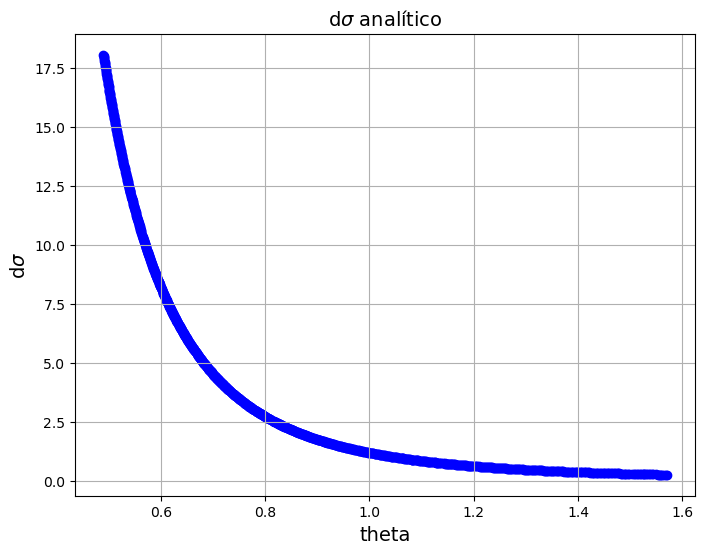

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(theta_chica, sigma_an, color='blue')
plt.xlabel("theta", fontsize=14)
plt.ylabel("d$\sigma$ ", fontsize=14)
plt.title("d$\sigma$ analítico", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.show()

In [125]:
def dsigma(b,db,theta):
    return b/np.sin(theta) * (1/np.abs(db))

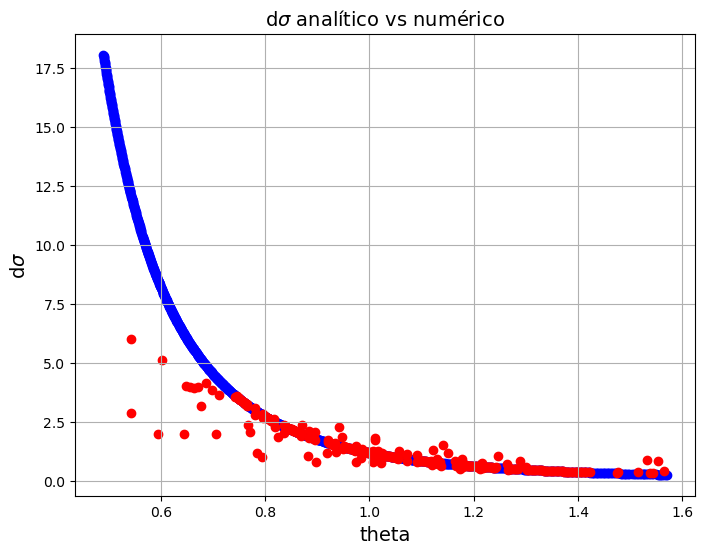

In [98]:
dsigma_1 = dsigma(b_filtrado ,derivada_b_filtrada, theta_chica_filtrado)
plt.figure(figsize=(8, 6))
plt.scatter(theta_chica, sigma_an, color='blue', label = 'analitico')
plt.scatter(theta_chica_filtrado, dsigma_1, color='r', label = 'numérico')
plt.xlabel("theta", fontsize=14)
plt.ylabel("d$\sigma$ ", fontsize=14)
plt.title("d$\sigma$ analítico vs numérico", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.show()

# Con cambio de variable

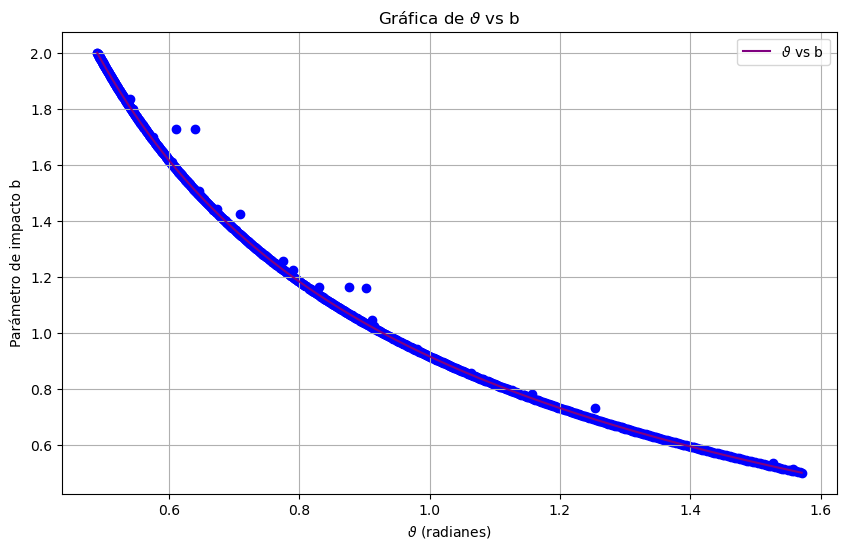

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

# Definimos el potencial
def V(r, k):
    return k / r

# Para sacar punto de retorno
def ecuacion(r, b, k, E):
    return 1 - (b**2 / r**2) - (V(r, k) / E)

# Definimos los parámetros
k = 1.0  # k positivo
E = 1.0  # E positivo
val_b = np.linspace(0.5, 2, 1000)
val_r = []

# Resolvemos la ecuación para cada valor de b
for b in val_b:
    r_inicial = 1.0
    r_solucion = fsolve(ecuacion, r_inicial, args=(b, k, E))
    val_r.append(r_solucion[0])

val_r = np.array(val_r)

# Definimos el integrando
def integrando(u, b, r, E):
    V_r = V(r, k)
    V_r_prima = V(r / (1 - u**2), k)  # V(r/(1-u^2))
    denominador = b**2 * (2 - u**2) + (r**2 / (E * u**2)) * (V_r - V_r_prima)
    return 1 / np.sqrt(denominador)

# Lista para almacenar valores de theta
valores_theta = []

# Definimos la función integral
def integral(b, r, E):
    valor_integral, _ = quad(integrando, 0, 1, args=(b, r, E))
    theta = np.pi - 4 * b * valor_integral
    return theta

# Calculamos la integral para cada valor de b y r
for b, r in zip(val_b, val_r):
    valores_theta.append(integral(b, r, E))

# Convertimos valores_theta a un array
valores_theta = np.array(valores_theta)

# Calculamos los valores de \vartheta para cada \theta
valores_Theta = (np.pi / 2) - (valores_Theta / 2)

# Graficamos vartheta vs b
plt.figure(figsize=(10, 6))
plt.plot(valores_theta,val_b , label=r'$\vartheta$ vs b', color='purple')
plt.scatter(theta_chica, b_values, color='blue')
plt.title(r'Gráfica de $\vartheta$ vs b')
plt.xlabel(r'$\vartheta$ (radianes)')
plt.ylabel('Parámetro de impacto b')
plt.grid()
plt.legend()
plt.show()


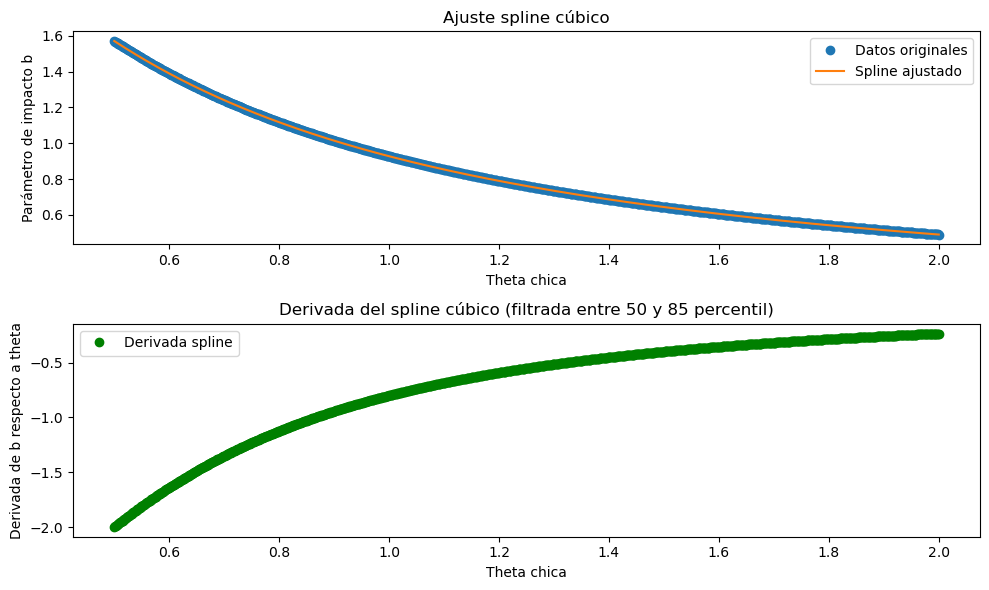

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def vel_1(theta_chica, b_values, percentil_inferior=5, percentil_superior=95):
    # Asegurarse de que theta_chica esté en orden ascendente
    indices_ordenados = np.argsort(theta_chica)
    theta_chica_ordenado = theta_chica[indices_ordenados]
    b_values_ordenado = b_values[indices_ordenados]
    
    # Ajustar spline cúbico
    spline = CubicSpline(theta_chica_ordenado, b_values_ordenado)
    
    # Derivar el spline
    derivada_spline = spline.derivative()
    
    # Calcular la derivada en los puntos de theta_chica
    derivada_b = derivada_spline(theta_chica_ordenado)
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    
    # Gráfico de la relación theta-b ajustada
    plt.subplot(2, 1, 1)
    plt.plot(theta_chica_ordenado, b_values_ordenado, 'o', label='Datos originales')
    plt.plot(theta_chica_ordenado, spline(theta_chica_ordenado), label='Spline ajustado')
    plt.xlabel('Theta chica')
    plt.ylabel('Parámetro de impacto b')
    plt.title('Ajuste spline cúbico')
    plt.legend()
    
    # Gráfico de la derivada filtrada por percentiles
    plt.subplot(2, 1, 2)
    plt.plot(theta_chica_ordenado, derivada_b, 'o', label='Derivada spline', color='green')
    plt.xlabel('Theta chica')
    plt.ylabel('Derivada de b respecto a theta')
    plt.title(f'Derivada del spline cúbico (filtrada entre {percentil_inferior} y {percentil_superior} percentil)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    return derivada_b

# Ejemplo de uso (reemplaza con tus datos reales):

# Ajusta los percentiles para filtrar outliers extremos
derivada_b = vel_1(val_b,valores_theta, percentil_inferior=50, percentil_superior=85)

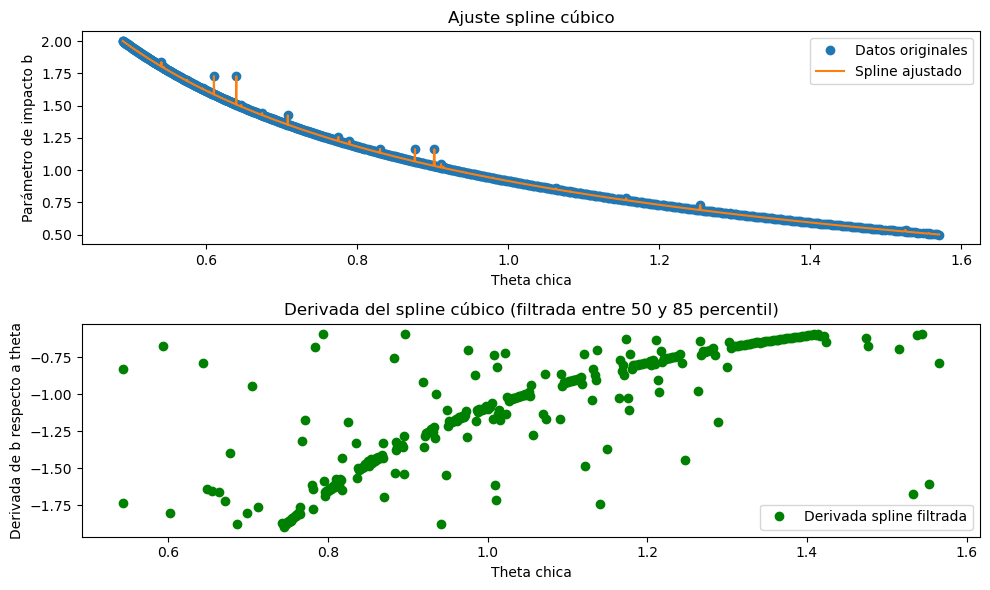

In [121]:
def vel(theta_chica, b_values, percentil_inferior=5, percentil_superior=95):
    # Asegurarse de que theta_chica esté en orden ascendente
    indices_ordenados = np.argsort(theta_chica)
    theta_chica_ordenado = theta_chica[indices_ordenados]
    b_values_ordenado = b_values[indices_ordenados]
    
    # Ajustar spline cúbico
    spline = CubicSpline(theta_chica_ordenado, b_values_ordenado)
    
    # Derivar el spline
    derivada_spline = spline.derivative()
    
    # Calcular la derivada en los puntos de theta_chica
    derivada_b = derivada_spline(theta_chica_ordenado)
    
    # Filtrar valores en los percentiles especificados
    percentil_min = np.percentile(derivada_b, percentil_inferior)
    percentil_max = np.percentile(derivada_b, percentil_superior)
    
    indices_filtrados = (derivada_b >= percentil_min) & (derivada_b <= percentil_max)
    theta_chica_filtrado = theta_chica_ordenado[indices_filtrados]
    derivada_b_filtrada = derivada_b[indices_filtrados]
    b_filtrado = b_values_ordenado[indices_filtrados]
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    
    # Gráfico de la relación theta-b ajustada
    plt.subplot(2, 1, 1)
    plt.plot(theta_chica_ordenado, b_values_ordenado, 'o', label='Datos originales')
    plt.plot(theta_chica_ordenado, spline(theta_chica_ordenado), label='Spline ajustado')
    plt.xlabel('Theta chica')
    plt.ylabel('Parámetro de impacto b')
    plt.title('Ajuste spline cúbico')
    plt.legend()
    
    # Gráfico de la derivada filtrada por percentiles
    plt.subplot(2, 1, 2)
    plt.plot(theta_chica_filtrado, derivada_b_filtrada, 'o', label='Derivada spline filtrada', color='green')
    plt.xlabel('Theta chica')
    plt.ylabel('Derivada de b respecto a theta')
    plt.title(f'Derivada del spline cúbico (filtrada entre {percentil_inferior} y {percentil_superior} percentil)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    return theta_chica_filtrado, b_filtrado, derivada_b_filtrada

# Ejemplo de uso (reemplaza con tus datos reales):
theta_chica_filtrado, b_filtrado, derivada_b_filtrada = vel(theta_chica, b_values, percentil_inferior=50, percentil_superior=85)


In [126]:
dsigma_2 = dsigma(val_b,derivada_b, valores_theta)
sigma_an = sigma_analitico(valores_theta,k,E)

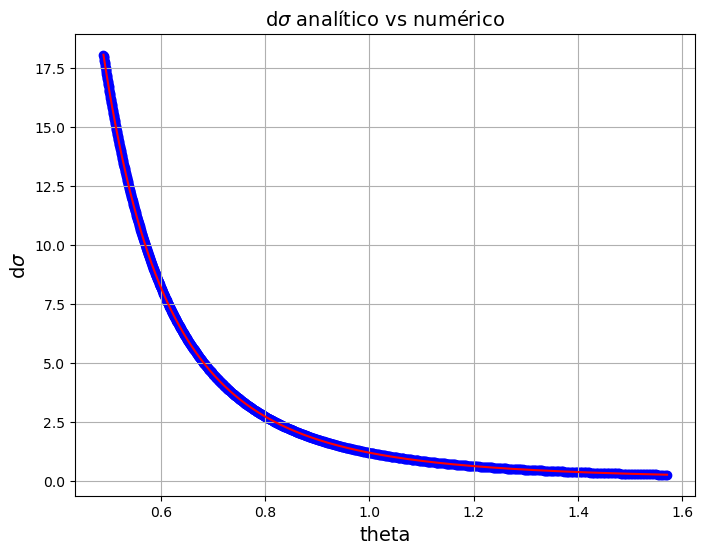

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(valores_theta, sigma_an, color='blue', label = 'analitico')
plt.plot(valores_theta, dsigma_2, color='r', label = 'numérico')
plt.xlabel("theta", fontsize=14)
plt.ylabel("d$\sigma$ ", fontsize=14)
plt.title("d$\sigma$ analítico vs numérico", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.show()

# Conclusión

Cuando tomé la integral que genera datos bastante mejor comportados la función realmente no hizo lo que era necesario